In [2]:
import kagglehub
import os
import os
import pandas as pd
import requests
from tqdm import tqdm

# Download latest version
path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

print("Path to dataset files:", path)

c:\Users\letha\.conda\envs\cs612project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5


In [3]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import kagglehub

# -----------------------------
# Download & set paths
# -----------------------------
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
img_dir = os.path.join(base_path, "SampleMoviePosters", "SampleMoviePosters")

print("CSV:", csv_path)
print("Images:", img_dir)

# -----------------------------
# Load CSV
# -----------------------------
df = pd.read_csv(csv_path, encoding="latin1")  # dataset has Latin-1 chars
print("Dataframe shape:", df.shape)
print(df.head())

# -----------------------------
# Visualize a few posters
# -----------------------------
def show_poster(idx):
    row = df.iloc[idx]
    img_name = row["Poster"]   # e.g., "tt0000574.jpg"
    img_path = os.path.join(img_dir, img_name)

    img = Image.open(img_path)

    plt.figure(figsize=(4,6))
    plt.imshow(img)
    plt.title(f"{row['Title']}\nGenres: {row['Genre']}")
    plt.axis("off")
    plt.show()

 

CSV: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5\MovieGenre.csv
Images: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5\SampleMoviePosters\SampleMoviePosters
Dataframe shape: (40108, 6)
   imdbId                           Imdb Link  \
0  114709  http://www.imdb.com/title/tt114709   
1  113497  http://www.imdb.com/title/tt113497   
2  113228  http://www.imdb.com/title/tt113228   
3  114885  http://www.imdb.com/title/tt114885   
4  113041  http://www.imdb.com/title/tt113041   

                                Title  IMDB Score                       Genre  \
0                    Toy Story (1995)         8.3  Animation|Adventure|Comedy   
1                      Jumanji (1995)         6.9     Action|Adventure|Family   
2             Grumpier Old Men (1995)         6.6              Comedy|Romance   
3            Waiting to Exhale (1995)         5.7        Comedy|Drama|Romance   
4  Father of the Bride Part 

In [4]:
import os
import pandas as pd
import requests
from tqdm import tqdm

# Path from kagglehub
import kagglehub
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Folder to save images
img_dir = os.path.join(base_path, "PostersLocal")
os.makedirs(img_dir, exist_ok=True)

def safe_filename(row):
    # Use imdbId as filename, safer than parsing URL
    return f"{row['imdbId']}.jpg"

 


In [5]:
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Folder to save images
img_dir = os.path.join(base_path, "PostersLocal")

In [6]:
import os
import pandas as pd
import requests
from tqdm import tqdm
import kagglehub

# Download dataset
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Create folder for local images
img_dir = os.path.join(base_path, "PostersLocal")
os.makedirs(img_dir, exist_ok=True)

# Function to give each poster a local filename
def poster_path(imdbId):
    return os.path.join(img_dir, f"{imdbId}.jpg")

In [7]:
# Download all posters
# for idx, row in tqdm(df.iterrows(), total=len(df)):
#     url = row["Poster"]
#     imdbId = row["imdbId"]
#     out_path = poster_path(imdbId)

#     if os.path.exists(out_path):
#         continue   # skip if already downloaded

#     try:
#         r = requests.get(url, timeout=10)
#         if r.status_code == 200:
#             with open(out_path, "wb") as f:
#                 f.write(r.content)
#         else:
#             print(f"Failed {imdbId}: HTTP {r.status_code}")
#     except:
#         print(f"Error downloading: {url}")

# print("Download completed")

In [8]:
df["local_path"] = df["imdbId"].apply(lambda x: poster_path(x))
df = df[df["local_path"].apply(os.path.exists)].reset_index(drop=True)

In [9]:
df.head()


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,local_path
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
2,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
3,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
4,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...


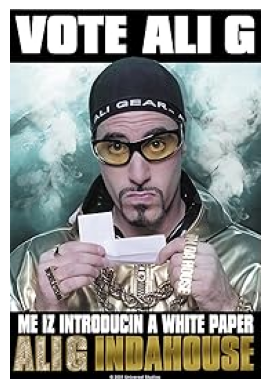

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import random 

img = Image.open(df.loc[ random.randint(0, df.shape[0]), "local_path"])
plt.imshow(img)
plt.axis("off")
plt.show()


In [11]:
!pip install seaborn

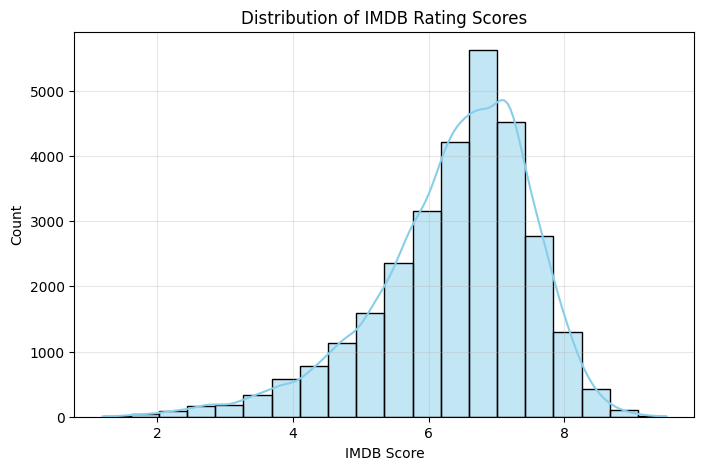

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains "IMDB Score"
scores = df["IMDB Score"].astype(float)

plt.figure(figsize=(8,5))
sns.histplot(scores, bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of IMDB Rating Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


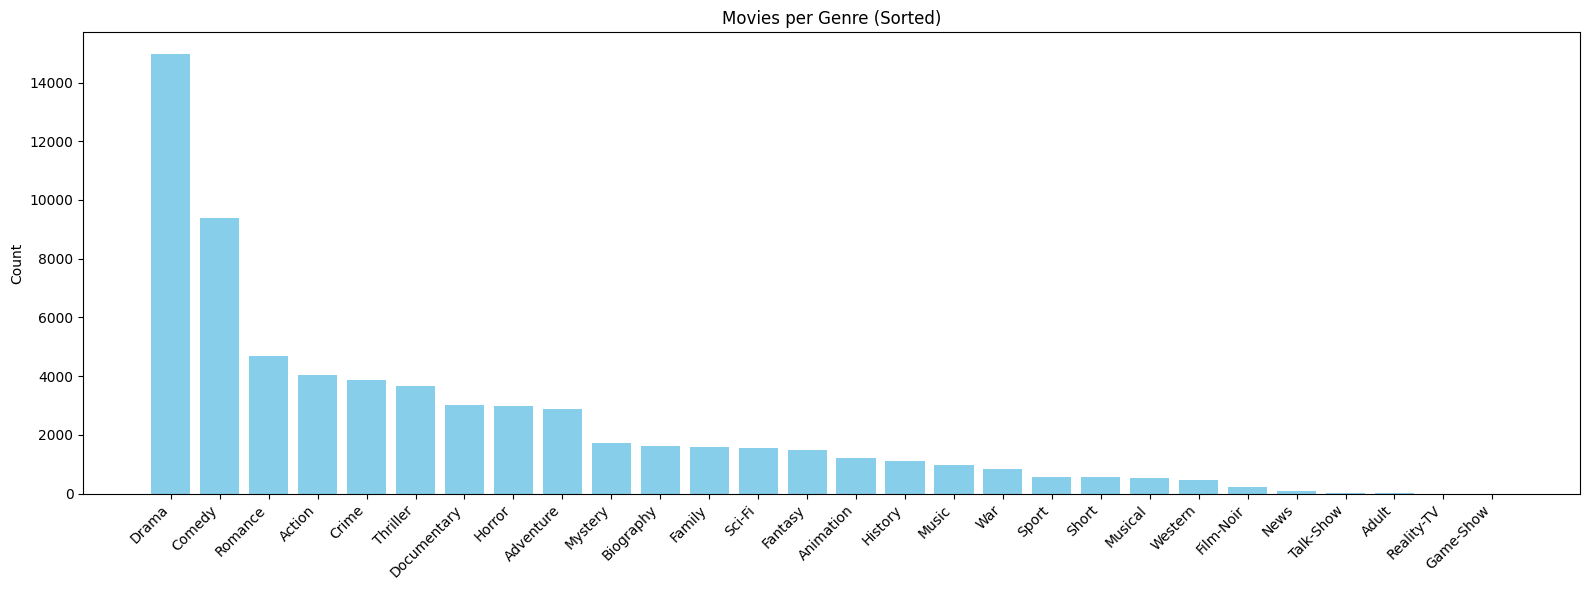

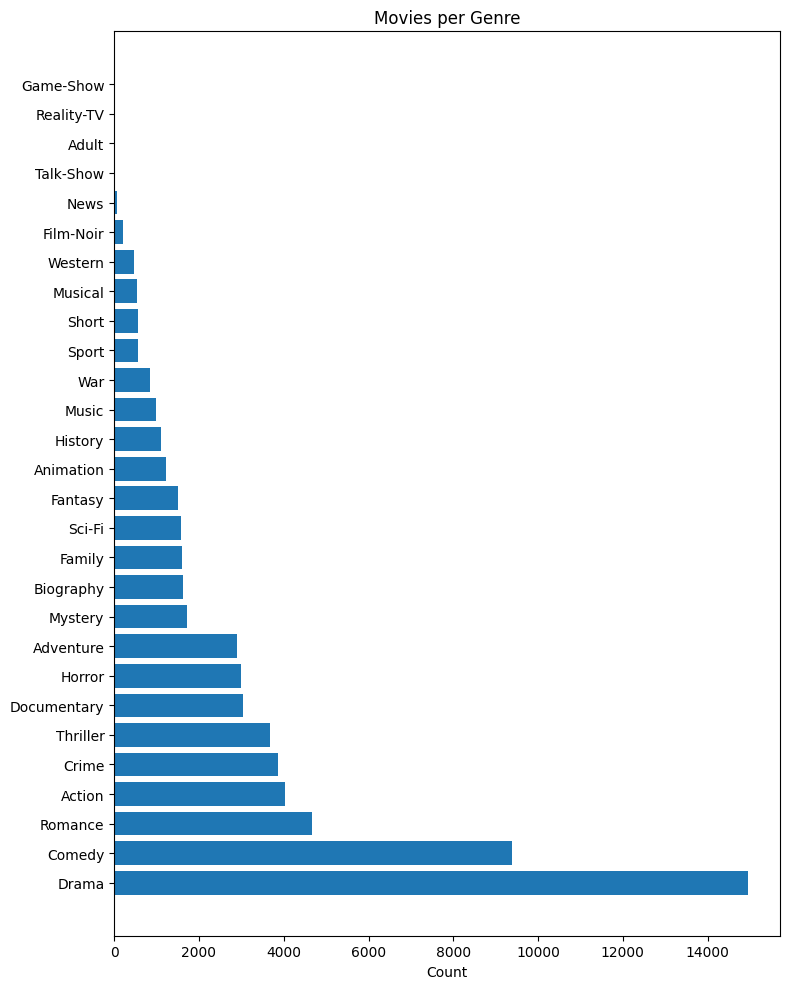

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# df must contain df["Genre"]
df = df.dropna(subset=["Genre"])

# ---- Count each genre ----
from collections import Counter

counter = Counter()

for g in df["Genre"]:
    genres = [x.strip() for x in g.split("|") if x.strip()]
    counter.update(genres)

# Convert to sorted lists
genres = list(counter.keys())
counts = list(counter.values())

genres_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
labels = [g for g, c in genres_sorted]
values = [c for g, c in genres_sorted]

plt.figure(figsize=(16, 6))
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Movies per Genre (Sorted)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 10))
plt.barh(labels, values)
plt.title("Movies per Genre")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


In [14]:
df

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,local_path
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
2,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
3,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
4,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
...,...,...,...,...,...,...,...
29355,4882174,http://www.imdb.com/title/tt4882174,37 (2016),3.9,Drama,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
29356,98216,http://www.imdb.com/title/tt98216,Roller Blade Warriors: Taken by Force (1989),3.9,Action|Adventure|Sci-Fi,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
29357,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,Comedy,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
29358,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,Horror,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...


In [15]:
#check how many movive have a certain genre
genre_to_check = "Comedy"   
count = 0
for g in df["Genre"]:
    genres = [x.strip() for x in g.split("|") if x.strip()]
    if genre_to_check in genres:
        count += 1          
print(f"Number of movies with genre '{genre_to_check}': {count}")
#!/usr/bin/env python3


Number of movies with genre 'Comedy': 9374


Dataset path: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5
before filtering missing posters: (40108, 6)
After filtering missing posters: (29360, 7)
imdbId          int64
Imdb Link      object
Title          object
IMDB Score    float64
Genre          object
Poster         object
local_path     object
dtype: object
Top 10 genres: {'Comedy', 'Action', 'Crime', 'Romance', 'Drama'}
After keeping only movies with at least one top-10 genre: (23621, 7)
Example genres after filtering:
0                  Comedy
1                  Action
2    Comedy|Drama|Romance
3          Comedy|Romance
4      Action|Crime|Drama
Name: Genre, dtype: object
   imdbId                           Imdb Link  \
0  114709  http://www.imdb.com/title/tt114709   
1  113497  http://www.imdb.com/title/tt113497   
2  114885  http://www.imdb.com/title/tt114885   
3  113041  http://www.imdb.com/title/tt113041   
4  113277  http://www.imdb.com/title/tt113277   

                      

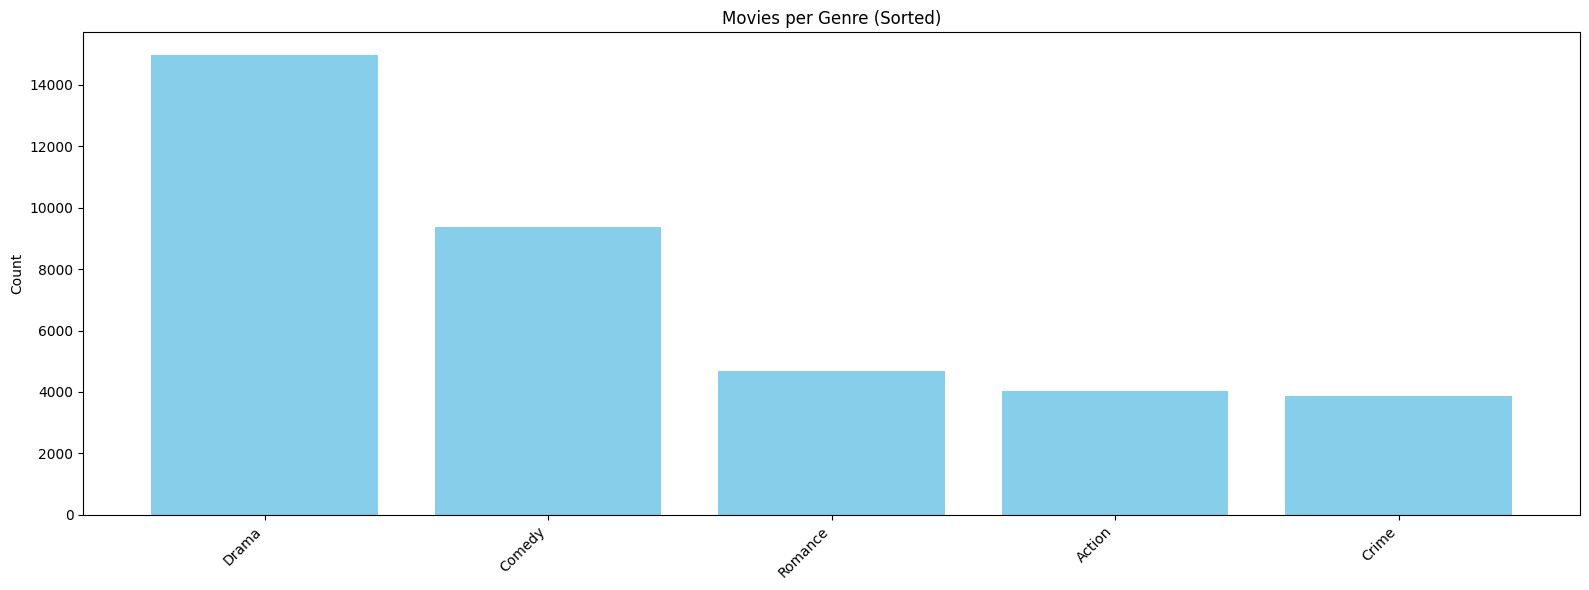

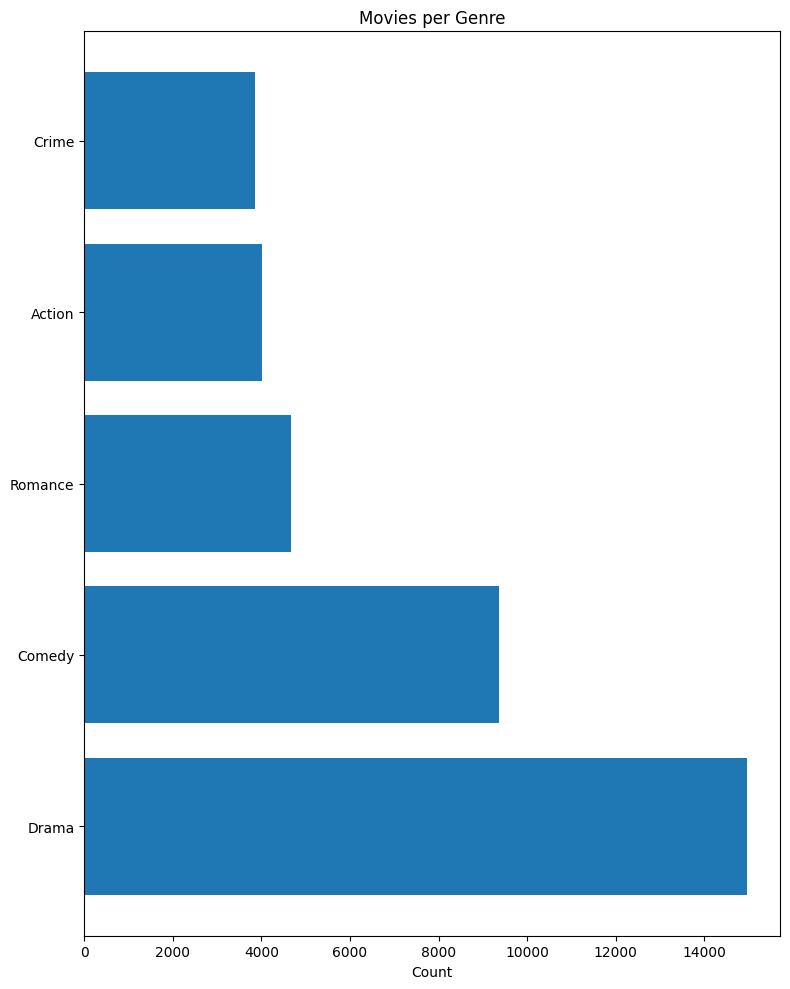

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from new_kaggleloader import KaggleLoader

loader = KaggleLoader("neha1703/movie-genre-from-its-poster")
df = loader.df()
print(df.head()) 

# df must contain df["Genre"]
df = df.dropna(subset=["Genre"])

# ---- Count each genre ----
from collections import Counter

counter = Counter()

for g in df["Genre"]:
    genres = [x.strip() for x in g.split("|") if x.strip()]
    counter.update(genres)

# Convert to sorted lists
genres = list(counter.keys())
counts = list(counter.values())

genres_sorted = sorted(counter.items(), key=lambda x: x[1], reverse=True)
labels = [g for g, c in genres_sorted]
values = [c for g, c in genres_sorted]

plt.figure(figsize=(16, 6))
plt.bar(labels, values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Movies per Genre (Sorted)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 10))
plt.barh(labels, values)
plt.title("Movies per Genre")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


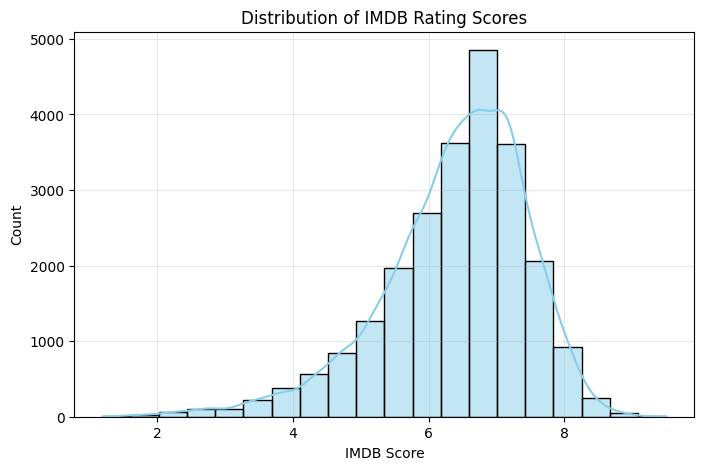

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains "IMDB Score"
scores = df["IMDB Score"].astype(float)

plt.figure(figsize=(8,5))
sns.histplot(scores, bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of IMDB Rating Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


In [28]:
import torch
import torchvision.transforms as T
from PIL import Image
import time
import numpy as np
from new_cnn_classification import CNNConfig, CNNClassifier   # import your classes
import os

def load_model(model_name, num_classes):
    """
    Load a trained model from models/<model_name>.pth
    """
    cfg = CNNConfig(model_name=model_name, pretrained_weights=False)
    cfg.num_classes = num_classes

    model = CNNClassifier(cfg)
    ckpt_path = f"models/{model_name}_genres.pth"
    state_dict = torch.load(ckpt_path, map_location="cpu")
    model.load_state_dict(state_dict)
    model.eval()
    return model


def measure_inference_time(model, device="cpu", runs=100):
    """
    Runs N forward passes and returns avg inference time (ms)
    """
    model.to(device)

    # Create dummy input (1, 3, 224, 224)
    dummy = torch.randn(1, 3, 224, 224).to(device)

    # Warm up (important for GPU)
    for _ in range(10):
        _ = model(dummy)

    torch.cuda.synchronize() if device == "cuda" else None

    # Measure
    start = time.time()
    for _ in range(runs):
        _ = model(dummy)
    torch.cuda.synchronize() if device == "cuda" else None
    end = time.time()

    avg_ms = (end - start) / runs * 1000
    return avg_ms


if __name__ == "__main__":
    device = "cuda" # "cuda" if torch.cuda.is_available() else "cpu"
    num_classes = 5   # <-- change if your dataset uses different number

    models_to_test = [
        "resnet18",
      
        "efficientnet_b0"
    ]

    print(f"Running inference benchmark on device: {device}\n")

    for name in models_to_test:
        if not os.path.exists(f"models/{name}_genres.pth"):
            print(f"[SKIP] No checkpoint for {name}\n")
            continue

        print(f"Loading model: {name}")
        model = load_model(name, num_classes)

        avg_ms = measure_inference_time(model, device, runs=200)

        print(f"✔ {name} — Average inference time: {avg_ms:.3f} ms\n")


Running inference benchmark on device: cuda

Loading model: resnet18
✔ resnet18 — Average inference time: 2.636 ms

Loading model: efficientnet_b0
✔ efficientnet_b0 — Average inference time: 6.271 ms



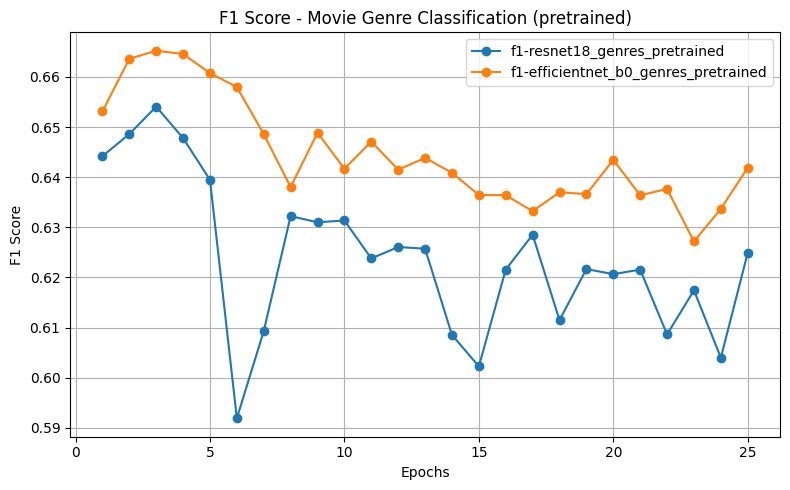

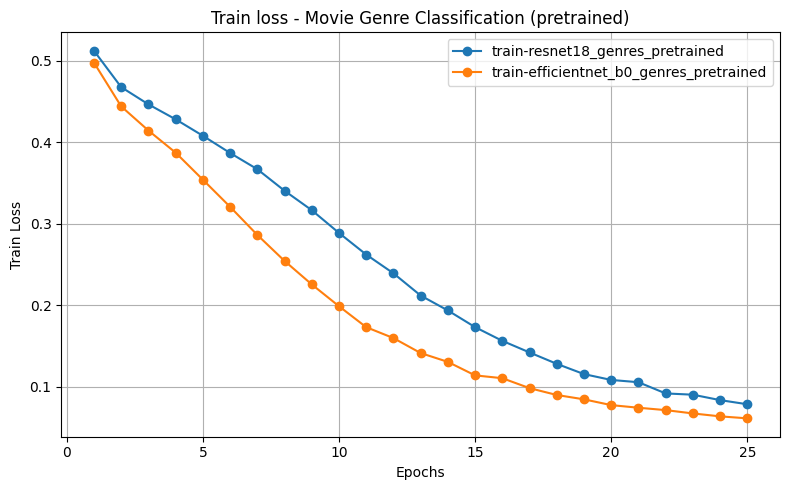

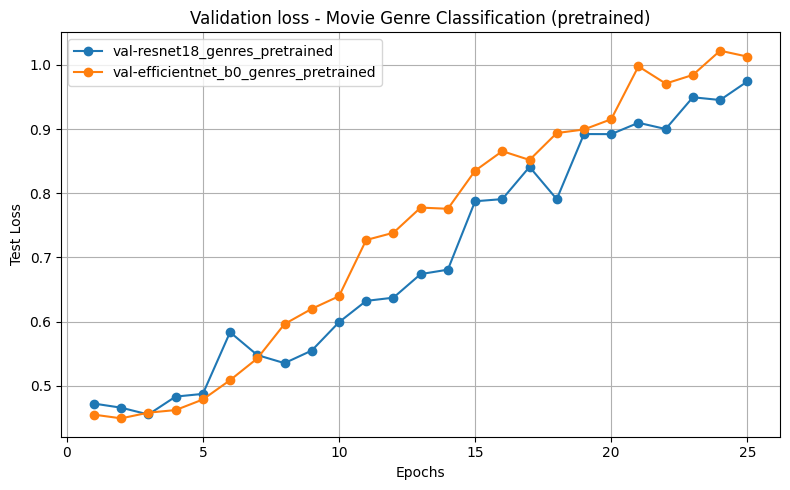

In [54]:
import matplotlib.pyplot as plt
import json

def plot_metrics(files, title="F1 Score vs Epochs", ylabel="F1 Score"):
    plt.figure(figsize=(8,5))

    for file_name in files:
        with open(file_name, "r") as f:
            data = json.load(f)

        # Extract epoch and F1
        epochs = [x[1] for x in data]
        f1_scores = [x[2] for x in data]

        label = file_name.split("/")[-1].replace(".json", "")
        plt.plot(epochs, f1_scores, marker='o', label=label)

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    # plt.ylim(0.55, .65)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Example usage:
# files = [
#     "metrics/f1-resnet18_genres.json", 
#     "metrics/f1-efficientnet_b0_genres.json"
# ]
# title = "F1 Score - Movie Genre Classification"
# plot_metrics(files, title=title)



# # Example usage:
# files = [
#     "metrics/train-resnet18_genres.json", 
#     "metrics/train-efficientnet_b0_genres.json"
# ]
# title = "Train loss - Movie Genre Classification"
# plot_metrics(files, title=title, ylabel="Train Loss")


# files = [
#     "metrics/val-resnet18_genres.json", 
#     "metrics/val-efficientnet_b0_genres.json"
# ]
# title = "Validation loss - Movie Genre Classification"
# plot_metrics(files, title=title, ylabel="Test Loss")



files = [
    "metrics/f1-resnet18_genres_pretrained.json", 
    "metrics/f1-efficientnet_b0_genres_pretrained.json"
]
title = "F1 Score - Movie Genre Classification (pretrained)"
plot_metrics(files, title=title)



# Example usage:
files = [
    "metrics/train-resnet18_genres_pretrained.json", 
    "metrics/train-efficientnet_b0_genres_pretrained.json"
]
title = "Train loss - Movie Genre Classification (pretrained)"
plot_metrics(files, title=title, ylabel="Train Loss")


files = [
    "metrics/val-resnet18_genres_pretrained.json", 
    "metrics/val-efficientnet_b0_genres_pretrained.json"
]
title = "Validation loss - Movie Genre Classification (pretrained)"
plot_metrics(files, title=title, ylabel="Test Loss")


